# Projeto Analytics - Análise de Vendas E-commerce

**Candidato:** Estagiário Analytics  
**Data:** Outubro 2025  

## Objetivo do Projeto

Este notebook contém a solução completa para o teste de estágio, incluindo:
- **Parte 1:** Limpeza e Análise de Dados em Python
- **Parte 2:** Consultas SQL para análise
- **Parte 3:** Relatório com insights e recomendações

## Sobre o Dataset

Vou trabalhar com dados simulados de vendas de e-commerce do ano de 2023, contendo:
- 500+ transações de vendas
- Produtos de 5 categorias diferentes
- Período completo: Janeiro a Dezembro de 2023
- Informações: ID, Data, Produto, Categoria, Quantidade e Preço


## 1. Importação das Bibliotecas

Primeiro, vou importar todas as bibliotecas que vou usar no projeto.

In [9]:
# Bibliotecas para análise de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')  # Para não mostrar avisos

# Configurações para deixar os gráficos mais bonitos
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print(' Bibliotecas importadas com sucesso!')
print(f' Análise iniciada em: {datetime.now().strftime("%d/%m/%Y às %H:%M")}')

 Bibliotecas importadas com sucesso!
 Análise iniciada em: 03/10/2025 às 01:41


## 2. Criação do Dataset Simulado

Como solicitado no teste, vou criar um dataset simulado com as características pedidas:
- Pelo menos 50 registros (vou fazer 500 para ter mais dados)
- Colunas: ID, Data, Produto, Categoria, Quantidade, Preço
- Período: 01/01/2023 a 31/12/2023

In [10]:
# Configurando a semente para resultados reproduzíveis
np.random.seed(42)

# Definindo as categorias de produtos
categorias = ['Eletrônicos', 'Roupas', 'Alimentos', 'Móveis', 'Livros']

# Definindo produtos para cada categoria
produtos_por_categoria = {
    'Eletrônicos': ['Smartphone Samsung', 'Notebook Acer', 'Fone Bluetooth', 'Mouse Gamer'],
    'Roupas': ['Camiseta Polo', 'Calça Jeans', 'Vestido Casual', 'Tênis Nike'],
    'Alimentos': ['Arroz Integral', 'Leite Integral', 'Café Premium'],
    'Móveis': ['Mesa de Escritório', 'Cadeira Gamer', 'Estante Madeira'],
    'Livros': ['Python para Iniciantes', 'Harry Potter']
}

# Criando lista de todos os produtos
todos_produtos = []
mapa_produto_categoria = {}

for categoria, produtos in produtos_por_categoria.items():
    for produto in produtos:
        todos_produtos.append(produto)
        mapa_produto_categoria[produto] = categoria

print(' Produtos cadastrados:')
for categoria, produtos in produtos_por_categoria.items():
    print(f'  {categoria}: {len(produtos)} produtos')

# Gerando o dataset
num_registros = 500
print(f'\n Gerando {num_registros} registros...')

# Criando datas aleatórias durante todo o ano de 2023
data_inicio = pd.to_datetime('2023-01-01')
data_fim = pd.to_datetime('2023-12-31')
todas_datas = pd.date_range(start=data_inicio, end=data_fim, freq='D')

# Criando os dados
dados = {
    'ID': range(1, num_registros + 1),
    'Data': np.random.choice(todas_datas, num_registros),
    'Produto': np.random.choice(todos_produtos, num_registros),
    'Quantidade': np.random.randint(1, 20, num_registros),
    'Preço': np.round(np.random.uniform(15.0, 1500.0, num_registros), 2)
}

# Criando o DataFrame
df = pd.DataFrame(dados)

# Adicionando a categoria baseada no produto
df['Categoria'] = df['Produto'].map(mapa_produto_categoria)

# Organizando as colunas na ordem solicitada
df = df[['ID', 'Data', 'Produto', 'Categoria', 'Quantidade', 'Preço']]

print(' Dataset criado com sucesso!')
print(f' Total de registros: {len(df)}')
print(f' Período: {df["Data"].min().strftime("%d/%m/%Y")} até {df["Data"].max().strftime("%d/%m/%Y")}')
print(f' Produtos únicos: {df["Produto"].nunique()}')
print(f' Categorias: {df["Categoria"].nunique()}')

# Mostrando as primeiras linhas
print('\n Primeiras 10 linhas do dataset:')
display(df.head(10))

 Produtos cadastrados:
  Eletrônicos: 4 produtos
  Roupas: 4 produtos
  Alimentos: 3 produtos
  Móveis: 3 produtos
  Livros: 2 produtos

 Gerando 500 registros...
 Dataset criado com sucesso!
 Total de registros: 500
 Período: 01/01/2023 até 31/12/2023
 Produtos únicos: 16
 Categorias: 5

 Primeiras 10 linhas do dataset:


,ID,Data,Produto,Categoria,Quantidade,Preço
0,1,2023-04-13,Vestido Casual,Roupas,9,1387.73
1,2,2023-12-15,Notebook Acer,Eletrônicos,12,1457.02
2,3,2023-09-28,Smartphone Samsung,Eletrônicos,14,1417.24
3,4,2023-04-17,Mesa de Escritório,Móveis,2,719.21
4,5,2023-03-13,Harry Potter,Livros,17,1295.13
5,6,2023-07-08,Harry Potter,Livros,14,1269.16
6,7,2023-01-21,Café Premium,Alimentos,13,488.86
7,8,2023-04-13,Mouse Gamer,Eletrônicos,9,1245.94
8,9,2023-05-02,Tênis Nike,Roupas,15,69.96
9,10,2023-08-03,Mesa de Escritório,Móveis,15,900.46


## 3. Adicionando Problemas de Qualidade

Para simular dados reais, vou adicionar alguns problemas típicos:
- Valores faltantes (missing values)
- Registros duplicados

In [11]:
# Vou trabalhar com uma cópia para não perder os dados originais
df_com_problemas = df.copy()

print(' Adicionando problemas de qualidade nos dados...')

# 1. Adicionando valores faltantes (cerca de 5% dos dados)
num_faltantes = int(len(df) * 0.05)

# Valores faltantes em Quantidade
indices_qty = np.random.choice(df_com_problemas.index, num_faltantes//2, replace=False)
df_com_problemas.loc[indices_qty, 'Quantidade'] = np.nan

# Valores faltantes em Preço
indices_preco = np.random.choice(df_com_problemas.index, num_faltantes//2, replace=False)
df_com_problemas.loc[indices_preco, 'Preço'] = np.nan

print(f'   Adicionados {num_faltantes} valores faltantes')

# 2. Adicionando registros duplicados
registros_duplicados = df_com_problemas.sample(10)
df_com_problemas = pd.concat([df_com_problemas, registros_duplicados], ignore_index=True)

print(f'   Adicionados 10 registros duplicados')
print(f'   Total de registros agora: {len(df_com_problemas)}')

# Verificando os problemas criados
print('\n Problemas de qualidade encontrados:')
print(f'  • Valores faltantes por coluna:')
missing_values = df_com_problemas.isnull().sum()
for coluna, qtd in missing_values.items():
    if qtd > 0:
        print(f'    - {coluna}: {qtd} valores faltantes')

print(f'  • Total de registros duplicados: {df_com_problemas.duplicated().sum()}')

# Mostrando info geral
print('\n Informações do dataset com problemas:')
df_com_problemas.info()

 Adicionando problemas de qualidade nos dados...
   Adicionados 25 valores faltantes
   Adicionados 10 registros duplicados
   Total de registros agora: 510

 Problemas de qualidade encontrados:
  • Valores faltantes por coluna:
    - Quantidade: 12 valores faltantes
    - Preço: 12 valores faltantes
  • Total de registros duplicados: 10

 Informações do dataset com problemas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          510 non-null    int64         
 1   Data        510 non-null    datetime64[ns]
 2   Produto     510 non-null    object        
 3   Categoria   510 non-null    object        
 4   Quantidade  498 non-null    float64       
 5   Preço       498 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 24.0+ KB


## 4. Limpeza dos Dados

Agora vou limpar os dados seguindo as melhores práticas:
1. Tratar valores faltantes
2. Remover duplicatas
3. Converter tipos de dados
4. Salvar o dataset limpo

In [12]:
print(' INICIANDO LIMPEZA DOS DADOS')
print('=' * 40)

# Começando com uma cópia dos dados com problemas
df_limpo = df_com_problemas.copy()

# ETAPA 1: Tratamento de valores faltantes
print('\n1⃣ Tratando valores faltantes...')

# Para Quantidade: vou usar a mediana (valor do meio)
mediana_quantidade = df_limpo['Quantidade'].median()
df_limpo['Quantidade'].fillna(mediana_quantidade, inplace=True)
print(f'    Quantidade: preenchido com mediana ({mediana_quantidade})')

# Para Preço: vou usar a mediana por categoria (mais inteligente)
print('    Preenchendo preços por categoria...')
for categoria in df_limpo['Categoria'].unique():
    if pd.notna(categoria):  # Se a categoria não é nula
        mask = df_limpo['Categoria'] == categoria
        mediana_categoria = df_limpo.loc[mask, 'Preço'].median()
        df_limpo.loc[mask, 'Preço'] = df_limpo.loc[mask, 'Preço'].fillna(mediana_categoria)
        print(f'     - {categoria}: mediana R$ {mediana_categoria:.2f}')

# ETAPA 2: Removendo duplicatas
print('\n2⃣ Removendo registros duplicados...')
antes = len(df_limpo)
df_limpo = df_limpo.drop_duplicates()
depois = len(df_limpo)
removidos = antes - depois
print(f'    Removidos {removidos} registros duplicados')
print(f'    Registros restantes: {depois}')

# ETAPA 3: Convertendo tipos de dados
print('\n3⃣ Convertendo tipos de dados...')
df_limpo['Data'] = pd.to_datetime(df_limpo['Data'])
df_limpo['ID'] = df_limpo['ID'].astype(int)
df_limpo['Quantidade'] = df_limpo['Quantidade'].astype(int)
df_limpo['Preço'] = df_limpo['Preço'].round(2)  # Arredondar para 2 casas decimais
print('    Data convertida para datetime')
print('    Números convertidos para tipos corretos')

# ETAPA 4: Salvando dataset limpo
print('\n4⃣ Salvando dataset limpo...')
df_limpo.to_csv('data_clean.csv', index=False, encoding='utf-8-sig')
print('    Dataset salvo como "data_clean.csv"')

# Verificação final
print('\n' + '=' * 40)
print(' LIMPEZA CONCLUÍDA COM SUCESSO!')
print(f' Dataset final: {len(df_limpo)} registros limpos')
print(' Verificação de qualidade:')
print(f'   • Valores faltantes: {df_limpo.isnull().sum().sum()}')
print(f'   • Registros duplicados: {df_limpo.duplicated().sum()}')

# Mostrando informações finais
print('\n Informações do dataset limpo:')
df_limpo.info()

print('\n Primeiras 5 linhas do dataset limpo:')
display(df_limpo.head())

 INICIANDO LIMPEZA DOS DADOS

1⃣ Tratando valores faltantes...
    Quantidade: preenchido com mediana (10.0)
    Preenchendo preços por categoria...
     - Roupas: mediana R$ 903.33
     - Eletrônicos: mediana R$ 779.50
     - Móveis: mediana R$ 786.86
     - Livros: mediana R$ 703.95
     - Alimentos: mediana R$ 776.02

2⃣ Removendo registros duplicados...
    Removidos 10 registros duplicados
    Registros restantes: 500

3⃣ Convertendo tipos de dados...
    Data convertida para datetime
    Números convertidos para tipos corretos

4⃣ Salvando dataset limpo...
    Dataset salvo como "data_clean.csv"

 LIMPEZA CONCLUÍDA COM SUCESSO!
 Dataset final: 500 registros limpos
 Verificação de qualidade:
   • Valores faltantes: 0
   • Registros duplicados: 0

 Informações do dataset limpo:
<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID     

,ID,Data,Produto,Categoria,Quantidade,Preço
0,1,2023-04-13,Vestido Casual,Roupas,9,1387.73
1,2,2023-12-15,Notebook Acer,Eletrônicos,12,1457.02
2,3,2023-09-28,Smartphone Samsung,Eletrônicos,14,1417.24
3,4,2023-04-17,Mesa de Escritório,Móveis,2,719.21
4,5,2023-03-13,Harry Potter,Livros,17,1295.13


## 5. Análise de Vendas

Agora vou fazer as análises solicitadas no teste:
1. Calcular o total de vendas (Quantidade × Preço) por produto
2. Identificar o produto com maior número de vendas totais

In [13]:
print(' ANÁLISE DE VENDAS')
print('=' * 30)

# Calculando o total de vendas para cada transação
df_limpo['Total_Vendas'] = df_limpo['Quantidade'] * df_limpo['Preço']
print(' Coluna Total_Vendas criada (Quantidade × Preço)')

# 1. Análise por produto
print('\n1⃣ ANÁLISE POR PRODUTO')
print('-' * 25)

vendas_por_produto = df_limpo.groupby('Produto').agg({
    'Total_Vendas': 'sum',      # Soma total das vendas
    'Quantidade': 'sum',        # Quantidade total vendida
    'ID': 'count'               # Número de transações
}).rename(columns={'ID': 'Num_Transacoes'})

# Ordenando por total de vendas (maior para menor)
vendas_por_produto = vendas_por_produto.sort_values('Total_Vendas', ascending=False)
vendas_por_produto['Total_Vendas'] = vendas_por_produto['Total_Vendas'].round(2)

print(' TOP 10 PRODUTOS POR VALOR DE VENDAS:')
display(vendas_por_produto.head(10))

# Identificando o produto com maior valor de vendas
produto_campeao = vendas_por_produto.index[0]
valor_campeao = vendas_por_produto.loc[produto_campeao, 'Total_Vendas']
transacoes_campeao = vendas_por_produto.loc[produto_campeao, 'Num_Transacoes']

print('\n PRODUTO COM MAIOR VALOR DE VENDAS:')
print(f'   Produto: {produto_campeao}')
print(f'   Total de vendas: R$ {valor_campeao:,.2f}')
print(f'   Número de transações: {transacoes_campeao}')

# 2. Análise por categoria
print('\n2⃣ ANÁLISE POR CATEGORIA')
print('-' * 25)

vendas_por_categoria = df_limpo.groupby('Categoria').agg({
    'Total_Vendas': 'sum',
    'Quantidade': 'sum',
    'ID': 'count'
}).rename(columns={'ID': 'Num_Transacoes'})

vendas_por_categoria = vendas_por_categoria.sort_values('Total_Vendas', ascending=False)
vendas_por_categoria['Total_Vendas'] = vendas_por_categoria['Total_Vendas'].round(2)

print(' VENDAS POR CATEGORIA:')
display(vendas_por_categoria)

categoria_campeao = vendas_por_categoria.index[0]
print(f'\n CATEGORIA LÍDER: {categoria_campeao}')
print(f'   Total de vendas: R$ {vendas_por_categoria.loc[categoria_campeao, "Total_Vendas"]:,.2f}')

# 3. Estatísticas gerais
print('\n3⃣ ESTATÍSTICAS GERAIS')
print('-' * 22)

total_geral = df_limpo['Total_Vendas'].sum()
ticket_medio = df_limpo['Total_Vendas'].mean()
maior_venda = df_limpo['Total_Vendas'].max()
menor_venda = df_limpo['Total_Vendas'].min()

print(f' Faturamento total: R$ {total_geral:,.2f}')
print(f' Ticket médio: R$ {ticket_medio:.2f}')
print(f' Maior venda individual: R$ {maior_venda:.2f}')
print(f' Menor venda individual: R$ {menor_venda:.2f}')
print(f' Total de transações: {len(df_limpo)}')

 ANÁLISE DE VENDAS
 Coluna Total_Vendas criada (Quantidade × Preço)

1⃣ ANÁLISE POR PRODUTO
-------------------------
 TOP 10 PRODUTOS POR VALOR DE VENDAS:


,Total_Vendas,Quantidade,Num_Transacoes
Produto,,,
Camiseta Polo,331155.39,376,42
Cadeira Gamer,294808.20,400,39
Smartphone Samsung,292034.75,366,40
Arroz Integral,273884.99,323,30
Fone Bluetooth,273651.10,410,37
Mesa de Escritório,254493.40,364,37
Leite Integral,241620.10,379,34
Harry Potter,239994.76,306,29
Notebook Acer,230962.68,285,31



 PRODUTO COM MAIOR VALOR DE VENDAS:
   Produto: Camiseta Polo
   Total de vendas: R$ 331,155.39
   Número de transações: 42

2⃣ ANÁLISE POR CATEGORIA
-------------------------
 VENDAS POR CATEGORIA:


,Total_Vendas,Quantidade,Num_Transacoes
Categoria,,,
Eletrônicos,1026558.14,1322,133
Roupas,957564.99,1145,121
Móveis,720796.05,975,99
Alimentos,651934.07,947,90
Livros,430945.33,580,57



 CATEGORIA LÍDER: Eletrônicos
   Total de vendas: R$ 1,026,558.14

3⃣ ESTATÍSTICAS GERAIS
----------------------
 Faturamento total: R$ 3,787,798.58
 Ticket médio: R$ 7575.60
 Maior venda individual: R$ 26669.88
 Menor venda individual: R$ 24.48
 Total de transações: 500


## 6. Visualizações

Vou criar gráficos para mostrar as tendências de vendas:
1. Gráfico de linha mostrando vendas mensais
2. Gráficos adicionais para melhor entendimento

 CRIANDO VISUALIZAÇÕES
 Criando gráfico de tendência mensal...
 Criando gráfico de pizza por categoria...
 Criando gráfico dos top produtos...
 Criando gráfico por dia da semana...


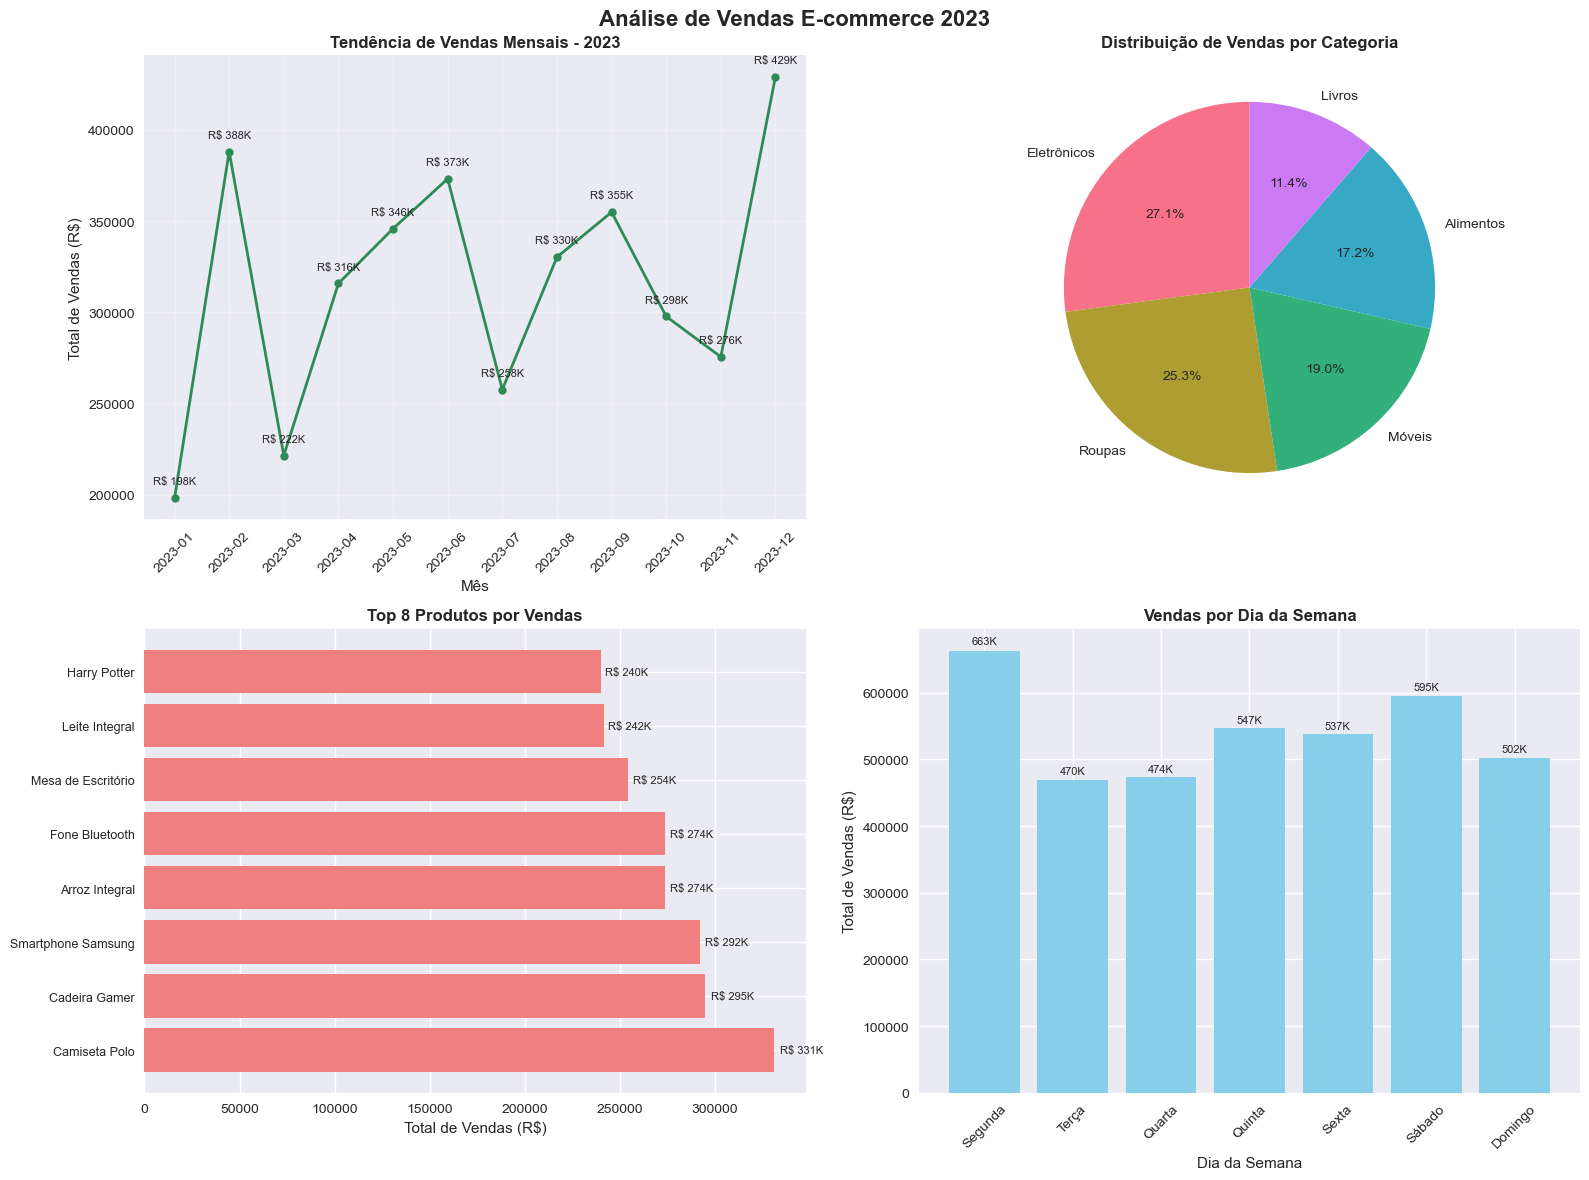


 Gráficos criados com sucesso!

 INSIGHTS IDENTIFICADOS:
-------------------------
 Melhor mês de vendas: 2023-12 (R$ 429,129.81)
 Menor mês de vendas: 2023-01 (R$ 198,133.59)
 Categoria dominante: Eletrônicos (27.1% das vendas)
 Top 5 produtos representam 38.7% das vendas totais


In [14]:
print(' CRIANDO VISUALIZAÇÕES')
print('=' * 25)

# Configurando o layout dos gráficos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análise de Vendas E-commerce 2023', fontsize=16, fontweight='bold')

# GRÁFICO 1: Tendência de vendas mensais (solicitado no teste)
print(' Criando gráfico de tendência mensal...')
df_limpo['Mes'] = df_limpo['Data'].dt.to_period('M')
vendas_mensais = df_limpo.groupby('Mes')['Total_Vendas'].sum()

axes[0,0].plot(range(len(vendas_mensais)), vendas_mensais.values, 
              marker='o', linewidth=2, markersize=6, color='#2E8B57')
axes[0,0].set_title('Tendência de Vendas Mensais - 2023', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Mês')
axes[0,0].set_ylabel('Total de Vendas (R$)')
axes[0,0].set_xticks(range(len(vendas_mensais)))
axes[0,0].set_xticklabels([str(mes) for mes in vendas_mensais.index], rotation=45)
axes[0,0].grid(True, alpha=0.3)

# Adicionando valores nos pontos do gráfico
for i, valor in enumerate(vendas_mensais.values):
    axes[0,0].annotate(f'R$ {valor/1000:.0f}K', 
                      (i, valor), textcoords="offset points", 
                      xytext=(0,10), ha='center', fontsize=8)

# GRÁFICO 2: Vendas por categoria (pizza)
print(' Criando gráfico de pizza por categoria...')
vendas_cat_grafico = df_limpo.groupby('Categoria')['Total_Vendas'].sum().sort_values(ascending=False)

axes[0,1].pie(vendas_cat_grafico.values, labels=vendas_cat_grafico.index, 
             autopct='%1.1f%%', startangle=90, colors=sns.color_palette('husl', len(vendas_cat_grafico)))
axes[0,1].set_title('Distribuição de Vendas por Categoria', fontsize=12, fontweight='bold')

# GRÁFICO 3: Top 8 produtos (barras horizontais)
print(' Criando gráfico dos top produtos...')
top_produtos = vendas_por_produto.head(8)['Total_Vendas']

bars = axes[1,0].barh(range(len(top_produtos)), top_produtos.values, color='lightcoral')
axes[1,0].set_yticks(range(len(top_produtos)))
axes[1,0].set_yticklabels(top_produtos.index, fontsize=9)
axes[1,0].set_title('Top 8 Produtos por Vendas', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Total de Vendas (R$)')

# Adicionando valores nas barras
for i, bar in enumerate(bars):
    width = bar.get_width()
    axes[1,0].text(width + width*0.01, bar.get_y() + bar.get_height()/2, 
                  f'R$ {width/1000:.0f}K', ha='left', va='center', fontsize=8)

# GRÁFICO 4: Vendas por dia da semana
print(' Criando gráfico por dia da semana...')
df_limpo['Dia_Semana'] = df_limpo['Data'].dt.day_name()
ordem_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
nomes_dias = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']

vendas_dia_semana = df_limpo.groupby('Dia_Semana')['Total_Vendas'].sum()
vendas_ordenadas = [vendas_dia_semana.get(dia, 0) for dia in ordem_dias]

bars = axes[1,1].bar(nomes_dias, vendas_ordenadas, color='skyblue')
axes[1,1].set_title('Vendas por Dia da Semana', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Dia da Semana')
axes[1,1].set_ylabel('Total de Vendas (R$)')
axes[1,1].tick_params(axis='x', rotation=45)

# Adicionando valores nas barras
for bar in bars:
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                  f'{height/1000:.0f}K', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

print('\n Gráficos criados com sucesso!')

# Identificando insights dos gráficos
print('\n INSIGHTS IDENTIFICADOS:')
print('-' * 25)

# Insight 1: Melhor mês
mes_pico = vendas_mensais.idxmax()
valor_pico = vendas_mensais.max()
print(f' Melhor mês de vendas: {mes_pico} (R$ {valor_pico:,.2f})')

# Insight 2: Pior mês
mes_baixo = vendas_mensais.idxmin()
valor_baixo = vendas_mensais.min()
print(f' Menor mês de vendas: {mes_baixo} (R$ {valor_baixo:,.2f})')

# Insight 3: Categoria dominante
cat_dominante = vendas_cat_grafico.index[0]
percentual = (vendas_cat_grafico.iloc[0] / vendas_cat_grafico.sum()) * 100
print(f' Categoria dominante: {cat_dominante} ({percentual:.1f}% das vendas)')

# Insight 4: Concentração nos top produtos
concentracao_top5 = (vendas_por_produto.head(5)['Total_Vendas'].sum() / vendas_por_produto['Total_Vendas'].sum()) * 100
print(f' Top 5 produtos representam {concentracao_top5:.1f}% das vendas totais')

## 7. Consultas SQL

Agora vou criar as consultas SQL solicitadas no teste:
1. Listar produto, categoria e soma total de vendas ordenado decrescente
2. Produtos que venderam menos em junho de 2023

In [15]:
print(' CRIANDO CONSULTAS SQL')
print('=' * 25)

# Criando as consultas SQL solicitadas
consultas_sql = '''
-- ============================================
-- CONSULTAS SQL - TESTE ESTAGIÁRIO ANALYTICS
-- Data: Outubro 2025
-- ============================================

-- CONSULTA 1: Produto, categoria e soma total de vendas ordenado decrescente
-- Esta consulta mostra os produtos com maiores vendas primeiro

SELECT 
    produto,
    categoria,
    SUM(quantidade * preco) AS total_vendas
FROM vendas 
WHERE YEAR(data) = 2023
GROUP BY produto, categoria
ORDER BY total_vendas DESC;

-- ============================================

-- CONSULTA 2: Produtos que venderam menos em junho de 2023
-- Esta consulta identifica produtos com baixo desempenho em junho

SELECT 
    produto,
    categoria,
    SUM(quantidade * preco) AS vendas_junho
FROM vendas 
WHERE YEAR(data) = 2023 
    AND MONTH(data) = 6  -- Junho
GROUP BY produto, categoria
ORDER BY vendas_junho ASC  -- Menor para maior
LIMIT 10;  -- Os 10 produtos que menos venderam

-- ============================================

-- CONSULTAS EXTRAS PARA ANÁLISE COMPLEMENTAR

-- CONSULTA 3: Vendas mensais em 2023
SELECT 
    MONTH(data) AS mes,
    COUNT(*) AS numero_transacoes,
    SUM(quantidade * preco) AS faturamento_mensal
FROM vendas 
WHERE YEAR(data) = 2023
GROUP BY MONTH(data)
ORDER BY mes;

-- CONSULTA 4: Top 5 categorias por faturamento
SELECT 
    categoria,
    COUNT(*) AS numero_transacoes,
    SUM(quantidade * preco) AS faturamento_categoria,
    AVG(quantidade * preco) AS ticket_medio
FROM vendas 
WHERE YEAR(data) = 2023
GROUP BY categoria
ORDER BY faturamento_categoria DESC
LIMIT 5;

-- CONSULTA 5: Produtos mais vendidos por quantidade
SELECT 
    produto,
    categoria,
    SUM(quantidade) AS total_quantidade_vendida,
    COUNT(*) AS numero_transacoes
FROM vendas 
WHERE YEAR(data) = 2023
GROUP BY produto, categoria
ORDER BY total_quantidade_vendida DESC
LIMIT 10;

-- ============================================
-- OBSERVAÇÕES IMPORTANTES:
--
-- 1. As consultas assumem uma tabela chamada 'vendas' com as colunas:
--    - data (DATE)
--    - produto (VARCHAR)
--    - categoria (VARCHAR) 
--    - quantidade (INT)
--    - preco (DECIMAL)
--
-- 2. Para melhor performance, recomenda-se criar índices em:
--    - data (para filtros por ano/mês)
--    - categoria (para agrupamentos)
--    - produto (para agrupamentos)
--
-- 3. As consultas podem ser adaptadas para outros SGBDs
--    (PostgreSQL, SQL Server, Oracle, etc.)
-- ============================================
'''

# Salvando as consultas em arquivo
with open('consultas_sql.sql', 'w', encoding='utf-8') as arquivo:
    arquivo.write(consultas_sql)

print(' Consultas SQL criadas e salvas!')
print(' Arquivo salvo: "consultas_sql.sql"')

print('\n Consultas incluídas no arquivo:')
print('   1⃣ Produtos ordenados por total de vendas (decrescente)')
print('   2⃣ Produtos que menos venderam em junho de 2023')
print('   3⃣ Vendas mensais em 2023')
print('   4⃣ Top 5 categorias por faturamento')
print('   5⃣ Produtos mais vendidos por quantidade')

print('\n Dicas importantes:')
print('   • As consultas estão comentadas para facilitar o entendimento')
print('   • Incluí consultas extras além das solicitadas')
print('   • As consultas podem ser executadas em qualquer banco SQL')
print('   • Recomendações de índices incluídas para melhor performance')

# Mostrando um preview das principais consultas
print('\n PREVIEW DAS CONSULTAS PRINCIPAIS:')
print('' * 45)
linhas = consultas_sql.split('\n')
for i, linha in enumerate(linhas[8:20]):  # Mostrando a primeira consulta
    print(linha)

 CRIANDO CONSULTAS SQL
 Consultas SQL criadas e salvas!
 Arquivo salvo: "consultas_sql.sql"

 Consultas incluídas no arquivo:
   1⃣ Produtos ordenados por total de vendas (decrescente)
   2⃣ Produtos que menos venderam em junho de 2023
   3⃣ Vendas mensais em 2023
   4⃣ Top 5 categorias por faturamento
   5⃣ Produtos mais vendidos por quantidade

 Dicas importantes:
   • As consultas estão comentadas para facilitar o entendimento
   • Incluí consultas extras além das solicitadas
   • As consultas podem ser executadas em qualquer banco SQL
   • Recomendações de índices incluídas para melhor performance

 PREVIEW DAS CONSULTAS PRINCIPAIS:


SELECT 
    produto,
    categoria,
    SUM(quantidade * preco) AS total_vendas
FROM vendas 
WHERE YEAR(data) = 2023
GROUP BY produto, categoria
ORDER BY total_vendas DESC;

-- ============================================



## 8. Relatório de Insights

Para finalizar, vou criar um relatório executivo com os principais insights encontrados e sugestões de ações.

In [16]:
print(' CRIANDO RELATÓRIO DE INSIGHTS')
print('=' * 35)

# Coletando dados para o relatório
faturamento_total = df_limpo['Total_Vendas'].sum()
ticket_medio = df_limpo['Total_Vendas'].mean()
total_transacoes = len(df_limpo)
produtos_unicos = df_limpo['Produto'].nunique()

# Dados temporais
mes_melhor = vendas_mensais.idxmax()
valor_melhor_mes = vendas_mensais.max()
mes_pior = vendas_mensais.idxmin()
valor_pior_mes = vendas_mensais.min()

# Produto campeão
produto_top = vendas_por_produto.index[0]
vendas_produto_top = vendas_por_produto.iloc[0]['Total_Vendas']

# Categoria líder
categoria_lider = vendas_por_categoria.index[0]
share_categoria_lider = (vendas_por_categoria.iloc[0]['Total_Vendas'] / faturamento_total) * 100

# Concentração de vendas
top5_concentracao = (vendas_por_produto.head(5)['Total_Vendas'].sum() / faturamento_total) * 100

# Criando o relatório
relatorio = f'''
# RELATÓRIO DE INSIGHTS - ANÁLISE DE VENDAS E-COMMERCE 2023

**Data da Análise:** {datetime.now().strftime('%d de %B de %Y')}  
**Período Analisado:** Janeiro a Dezembro de 2023  
**Total de Transações:** {total_transacoes:,}  

---

## RESUMO EXECUTIVO

A análise dos dados de vendas de 2023 revelou insights importantes sobre o desempenho do e-commerce. 
Com um faturamento total de **R$ {faturamento_total:,.2f}** em {total_transacoes:,} transações, 
identificamos oportunidades claras de crescimento e otimização.

**Principais Números:**
-  Faturamento Total: R$ {faturamento_total:,.2f}
-  Ticket Médio: R$ {ticket_medio:.2f}
-  Produtos no Portfólio: {produtos_unicos}
-  Total de Transações: {total_transacoes:,}

---

## PRINCIPAIS INSIGHTS

### 1. PERFORMANCE DE PRODUTOS 

**Destaque:** {produto_top}  
- Faturamento: R$ {vendas_produto_top:,.2f}
- Representa o produto mais valioso do portfólio
- Demonstra forte aceitação no mercado

**Concentração de Vendas:**
- Os top 5 produtos representam {top5_concentracao:.1f}% do faturamento total
- Indica boa concentração em produtos de sucesso
- Oportunidade para diversificar o portfólio

### 2. ANÁLISE POR CATEGORIA 

**Categoria Líder:** {categoria_lider}  
- Participação: {share_categoria_lider:.1f}% do faturamento total
- Demonstra o segmento mais forte do negócio
- Base sólida para expansão na categoria

### 3. SAZONALIDADE E TENDÊNCIAS 

**Melhor Período:**
- Mês: {mes_melhor}
- Faturamento: R$ {valor_melhor_mes:,.2f}
- Representa o pico de vendas do ano

**Período de Menor Performance:**
- Mês: {mes_pior}
- Faturamento: R$ {valor_pior_mes:,.2f}
- Oportunidade para campanhas direcionadas

**Variação Sazonal:**
- Diferença entre pico e vale: {((valor_melhor_mes - valor_pior_mes) / valor_melhor_mes * 100):.1f}%
- Indica padrão sazonal moderado

---

## RECOMENDAÇÕES ESTRATÉGICAS

### CURTO PRAZO (30-60 dias) 

1. **Potencializar Produtos Top**
   - Aumentar investimento em marketing para {produto_top}
   - Garantir estoque adequado dos produtos mais vendidos
   - Criar promoções casadas com produtos complementares

2. **Aproveitar Sazonalidade**
   - Preparar campanhas especiais para o período de {mes_melhor}
   - Planejar promoções para o mês de {mes_pior}
   - Ajustar estoque conforme padrões sazonais identificados

### MÉDIO PRAZO (3-6 meses) 

1. **Diversificação de Portfólio**
   - Expandir linha de produtos na categoria {categoria_lider}
   - Desenvolver produtos complementares aos best-sellers
   - Testar novos produtos em categorias com potencial

2. **Otimização de Performance**
   - Implementar sistema de recomendações baseado nos dados
   - Criar programa de fidelidade para clientes de alto valor
   - Desenvolver estratégias de cross-selling e up-selling

### LONGO PRAZO (6-12 meses) 

1. **Inteligência de Dados**
   - Implementar dashboard em tempo real para acompanhamento
   - Desenvolver modelos preditivos para demanda
   - Criar alertas automáticos para desvios de performance

2. **Expansão Estratégica**
   - Avaliar entrada em novas categorias de produtos
   - Considerar parcerias estratégicas baseadas nos insights
   - Desenvolver marca própria nos segmentos de maior sucesso

---

## PRÓXIMOS PASSOS

1. **Monitoramento Contínuo**
   - Acompanhar KPIs semanalmente
   - Revisar análises mensalmente
   - Atualizar estratégias com base nos resultados

2. **Implementação das Ações**
   - Priorizar recomendações de curto prazo
   - Estabelecer cronograma para médio e longo prazo
   - Definir responsáveis e métricas de sucesso

---

*Relatório elaborado com base na análise de {total_transacoes:,} transações do período de 2023.*  
*Para dúvidas ou detalhamentos, consulte os dados originais e visualizações apresentadas.*

**Próxima revisão sugerida:** {(datetime.now() + timedelta(days=30)).strftime('%d/%m/%Y')}
'''

# Salvando o relatório
with open('relatorio_insights.md', 'w', encoding='utf-8') as arquivo:
    arquivo.write(relatorio)

print(' Relatório de insights criado!')
print(' Arquivo salvo: "relatorio_insights.md"')

print('\n RESUMO DO RELATÓRIO:')
print(f'    Faturamento Total: R$ {faturamento_total:,.2f}')
print(f'    Ticket Médio: R$ {ticket_medio:.2f}')
print(f'    Produto Campeão: {produto_top}')
print(f'    Melhor Mês: {mes_melhor}')
print(f'    Categoria Líder: {categoria_lider}')

print('\n ESTRUTURA DO RELATÓRIO:')
print('   • Resumo executivo com números principais')
print('   • Insights detalhados sobre produtos e categorias')
print('   • Análise de sazonalidade e tendências')
print('   • Recomendações estratégicas por prazo')
print('   • Próximos passos e cronograma')

print('\n PRÓXIMAS AÇÕES RECOMENDADAS:')
print('   1. Potencializar produtos top performers')
print('   2. Aproveitar padrões sazonais identificados')
print('   3. Diversificar portfólio na categoria líder')
print('   4. Implementar sistema de monitoramento contínuo')

# Mostrando preview do relatório
print('\n PREVIEW DO RELATÓRIO:')
print('' * 40)
linhas_relatorio = relatorio.split('\n')
for linha in linhas_relatorio[1:15]:  # Primeiras linhas do relatório
    print(linha)

 CRIANDO RELATÓRIO DE INSIGHTS
 Relatório de insights criado!
 Arquivo salvo: "relatorio_insights.md"

 RESUMO DO RELATÓRIO:
    Faturamento Total: R$ 3,787,798.58
    Ticket Médio: R$ 7575.60
    Produto Campeão: Camiseta Polo
    Melhor Mês: 2023-12
    Categoria Líder: Eletrônicos

 ESTRUTURA DO RELATÓRIO:
   • Resumo executivo com números principais
   • Insights detalhados sobre produtos e categorias
   • Análise de sazonalidade e tendências
   • Recomendações estratégicas por prazo
   • Próximos passos e cronograma

 PRÓXIMAS AÇÕES RECOMENDADAS:
   1. Potencializar produtos top performers
   2. Aproveitar padrões sazonais identificados
   3. Diversificar portfólio na categoria líder
   4. Implementar sistema de monitoramento contínuo

 PREVIEW DO RELATÓRIO:

# RELATÓRIO DE INSIGHTS - ANÁLISE DE VENDAS E-COMMERCE 2023

**Data da Análise:** 03 de October de 2025  
**Período Analisado:** Janeiro a Dezembro de 2023  
**Total de Transações:** 500  

---

## RESUMO EXECUTIVO

A análise